Number of person pixels in sample 5: 4684


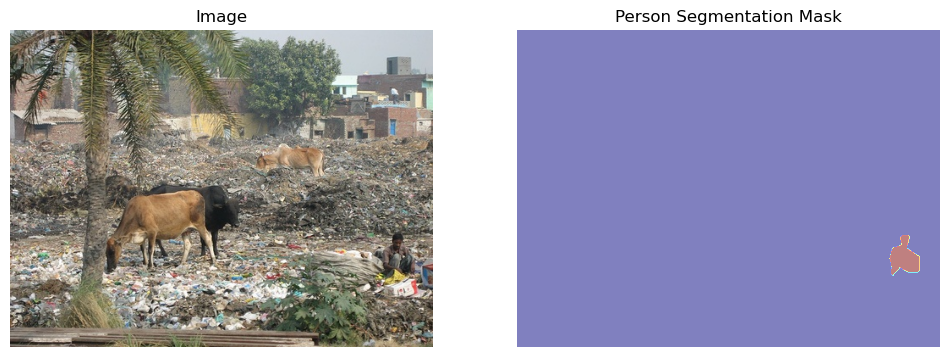

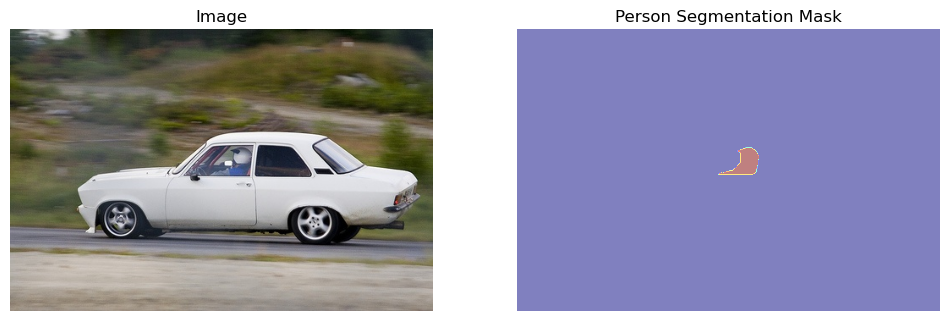

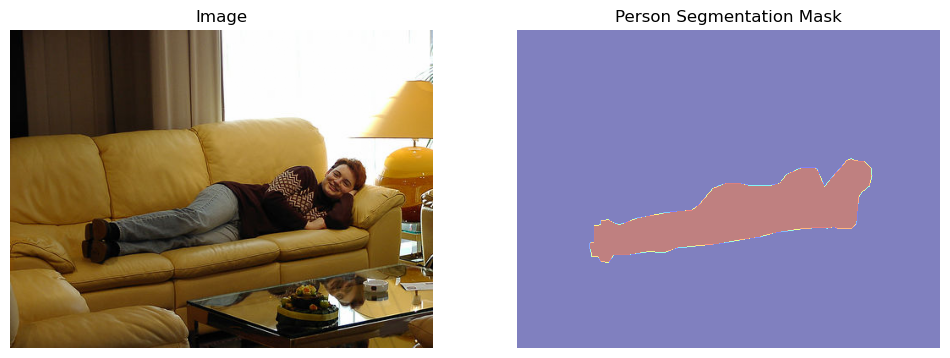

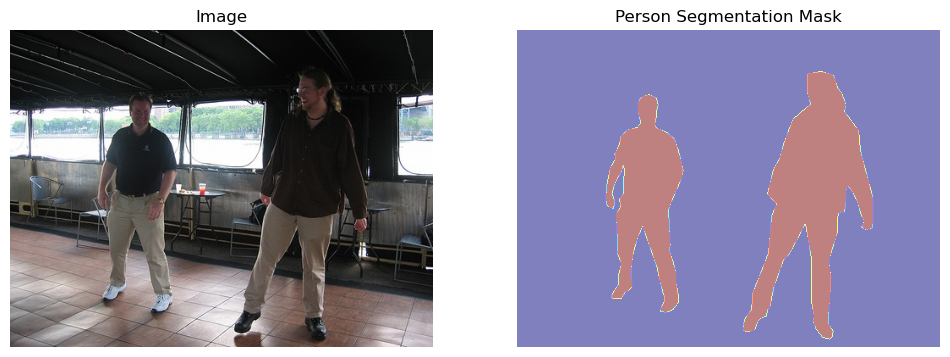

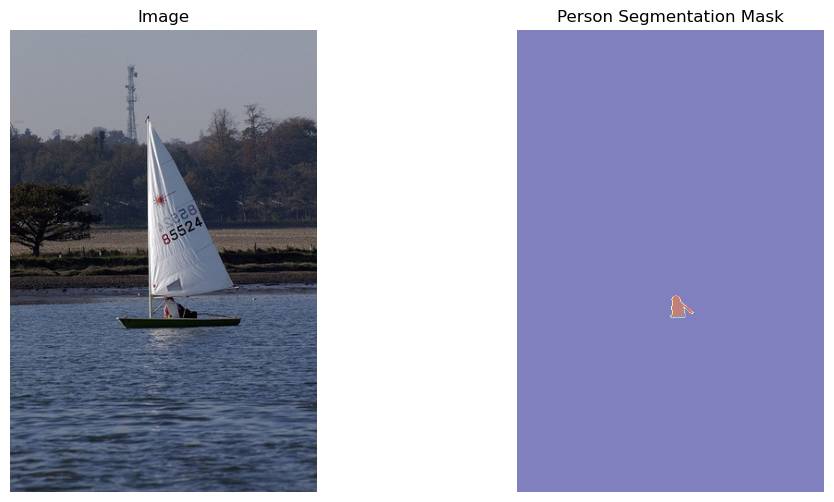

In [39]:
import torch
from torchvision.datasets import VOCSegmentation
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

class PascalVOCPersonDataset:
    def __init__(self, root=".", year="2012"):
        self.root = root
        self.year = year
        self.person_class_index = 15  # 'Person' class index in Pascal VOC
        self.transform = transforms.ToTensor()  # Transformation to convert images and masks to tensors

    def _load_and_filter(self, image_set):
        # Load dataset (train or val) and filter by the 'person' class
        dataset = VOCSegmentation(root=self.root, year=self.year, image_set=image_set, download=False, transforms=None)
        person_only_data = []

        for i in range(len(dataset)):
            image, mask = dataset[i]
            mask_np = np.array(mask)
            
            # Check if the mask contains the 'person' class by matching values in the mask
            if self.person_class_index in mask_np:
                person_mask = (mask_np == self.person_class_index).astype(np.uint8)
                person_only_data.append((self.transform(image), torch.tensor(person_mask)))
        
        return person_only_data

    def get_datasets(self):
        # Return filtered datasets for both training and validation
        train_data = self._load_and_filter("train")
        val_data = self._load_and_filter("val")
        return train_data, val_data

def display_random_samples(dataset, num_samples=5):
    # Display random samples from the dataset
    samples = random.sample(dataset, num_samples)
    for image, mask in samples:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Display image
        ax1.imshow(image.permute(1, 2, 0))
        ax1.set_title("Image")
        ax1.axis("off")
        
        # Display person segmentation mask
        mask_np = mask.numpy()  # Convert mask tensor to numpy
        ax2.imshow(mask_np, cmap="jet", alpha=0.5)
        ax2.set_title("Person Segmentation Mask")
        ax2.axis("off")
        
        plt.show()

# Instantiate the wrapper and get train/val datasets
voc_person_dataset = PascalVOCPersonDataset(root="../../data")
train_data, val_data = voc_person_dataset.get_datasets()

# Verify that the mask has person regions
mask = train_data[5][1]
person_pixels = np.sum(mask.numpy())
print(f"Number of person pixels in sample 5: {person_pixels}")  # Should be greater than 0 if there are persons in the mask

# Display 5 random samples from the training dataset
display_random_samples(train_data, num_samples=5)


In [36]:
mask = train_data[5][1]
mask_np = mask.squeeze().numpy()  # Convert mask tensor to numpy
person_mask = np.where(mask_np == 15, 1, 0)  # Set 'person' class pixels to 1, others to 0
np.sum(person_mask)

np.int64(0)

In [35]:
np.sum(mask_np)

np.float32(7047.6475)